In [34]:
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
greater_than = 8

In [36]:
%%time

data_address = '../Data/'
df_gal = pd.read_csv(data_address + f'massive_galaxies_10_{greater_than}.csv') 

df_gal.describe()

CPU times: user 8.97 s, sys: 784 ms, total: 9.75 s
Wall time: 9.75 s


,x[kpc/h],y[kpc/h],z[kpc/h],m[Msol/h],host,dist[kpc/h],vx[km/s],vy[km/s],vz[km/s]
count,9.184007e+06,9.184007e+06,9.184007e+06,9.184007e+06,9.184007e+06,9.184007e+06,9.184007e+06,9.184007e+06,9.184007e+06
mean,3.227965e+05,3.212658e+05,3.203963e+05,1.835536e+10,5.307991e+04,4.183124e+01,-2.168058e-01,1.159896e-01,8.554355e-02
std,1.850009e+05,1.836559e+05,1.837623e+05,5.968222e+10,1.330699e+04,1.601057e+02,3.521816e+02,3.457874e+02,3.293684e+02
min,2.472523e-02,4.897413e-03,8.584157e-02,1.408010e+08,0.000000e+00,0.000000e+00,-4.338618e+03,-3.448558e+03,-3.531906e+03
25%,1.611469e+05,1.632932e+05,1.615272e+05,2.066080e+09,5.723700e+04,0.000000e+00,-2.234692e+02,-2.181064e+02,-2.052922e+02
50%,3.268581e+05,3.249696e+05,3.203467e+05,6.057140e+09,5.723700e+04,0.000000e+00,-5.354158e+00,2.217281e+00,-6.671054e-01
75%,4.820850e+05,4.770828e+05,4.787981e+05,2.006780e+10,5.723700e+04,0.000000e+00,2.187658e+02,2.185912e+02,2.044876e+02
max,6.399999e+05,6.399998e+05,6.399999e+05,1.077460e+13,5.723700e+04,2.689410e+03,3.405616e+03,3.897406e+03,3.396540e+03


In [37]:
df_clusters_subset = pd.read_csv(data_address + 'massive_clusters.csv', 
                          usecols = ['UID', 'x[kpc/h]', 'y[kpc/h]', 'z[kpc/h]', 
                                     'm500c[Msol/h]', 'vx[km/s]', 'vy[km/s]', 'vz[km/s]'    ])  #massive_clusters.csv contains clusters with M_500c greater than 10^13.5 h^{-1} M_sun as done by Tanimura et al. (2020)

df_clusters_subset.describe()

,UID,x[kpc/h],y[kpc/h],z[kpc/h],m500c[Msol/h],vx[km/s],vy[km/s],vz[km/s]
count,6080.000000,6080.000000,6080.000000,6080.000000,6.080000e+03,6080.000000,6080.000000,6080.000000
mean,3488.193257,326416.401838,322055.402286,321308.240244,6.356245e+13,2.109102,-1.647297,-4.296055
std,2329.428037,186021.550694,182650.899538,183665.854310,4.851698e+13,316.064539,306.226537,286.454388
min,0.000000,19.163288,152.653880,87.370949,3.162340e+13,-1179.530000,-1163.520000,-1104.790000
25%,1534.750000,160978.575000,164793.430000,161863.925000,3.795035e+13,-200.229000,-205.139250,-190.806000
50%,3195.500000,338884.565000,333274.345000,322110.075000,4.801630e+13,-3.619450,1.969450,-8.055475
75%,5159.250000,486227.747500,473556.765000,478893.610000,6.945502e+13,206.816750,207.755750,181.532000
max,11472.000000,639887.560000,639933.380000,639848.380000,7.438200e+14,1197.640000,1164.960000,1201.260000


In [38]:
mask = df_gal['host'].isin(df_clusters_subset['UID'])
df_gal_around_6k_clus = df_gal[mask]

df_gal_around_6k_clus.describe()



,x[kpc/h],y[kpc/h],z[kpc/h],m[Msol/h],host,dist[kpc/h],vx[km/s],vy[km/s],vz[km/s]
count,336184.000000,336184.000000,336184.000000,3.361840e+05,336184.000000,336184.000000,336184.000000,336184.000000,336184.000000
mean,329172.854786,323241.560822,322906.426669,4.923651e+10,2486.896536,595.814059,1.038958,1.725178,-1.873782
std,187281.042578,181124.769894,183633.949853,2.338373e+11,2201.868529,377.378621,639.969873,637.498271,626.754992
min,0.946504,0.307792,0.260974,1.408510e+08,0.000000,0.000000,-4338.617700,-3448.557900,-3531.906000
25%,160940.610000,168424.262500,164808.947500,2.247975e+09,633.000000,299.921750,-406.899723,-404.425790,-401.220468
50%,345522.295000,337118.125000,322110.185000,8.229665e+09,1873.000000,545.659000,0.166462,0.448893,-3.547375
75%,491903.530000,471042.432500,479061.682500,2.512610e+10,3878.000000,840.701250,409.798975,407.306480,396.476010
max,639995.750000,639996.310000,639997.560000,1.077460e+13,11472.000000,2689.410000,3405.616200,3897.405800,3396.539600


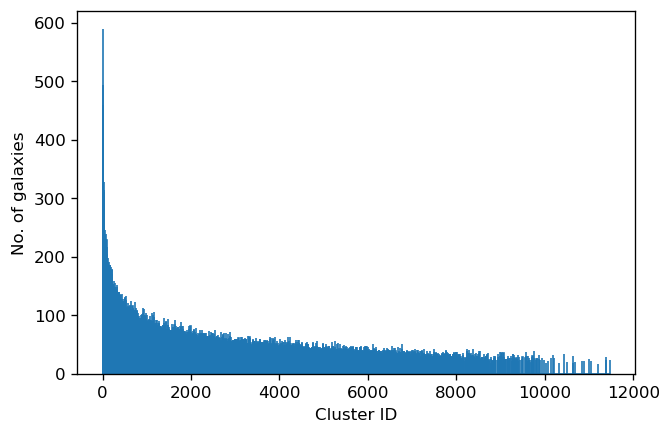

In [39]:
dpi = 120
plt.figure(dpi = dpi)
plt.hist(df_gal_around_6k_clus['host'], bins = max(df_gal_around_6k_clus['host']), 
         ec = 'C0')
# plt.yscale('log')
plt.xlabel('Cluster ID')
plt.ylabel('No. of galaxies');

In [40]:
print(df_gal_around_6k_clus.groupby('host').size().mean())

print(df_gal_around_6k_clus.groupby('host').size().sum())
print(len(df_gal_around_6k_clus))

55.29342105263158
336184
336184


Mean no of galaxies:  55.29
Mean distance of galaxies:  595.81 kpc/h


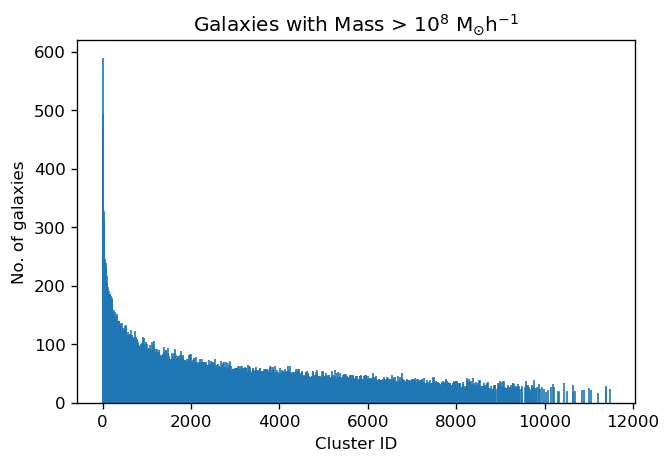

In [49]:
dpi = 120
plt.figure(dpi = dpi)

ser_gal_count = df_gal_around_6k_clus.groupby('host').size()
plt.bar(ser_gal_count.index, height = ser_gal_count,ec = 'C0');

# plt.yscale('log')
plt.xlabel('Cluster ID')
plt.ylabel('No. of galaxies');
plt.title('Galaxies with Mass > 10$^' + f'{greater_than}' + '$ M$_{\odot}$h$^{\mathrm{-1}}$');

print('Mean no of galaxies: ', round(df_gal_around_6k_clus.groupby('host').size().mean(), 2))
print('Mean distance of galaxies: ', round(df_gal_around_6k_clus['dist[kpc/h]'].mean(), 2), 'kpc/h')

In [53]:
df_clusters_subset

,UID,x[kpc/h],y[kpc/h],z[kpc/h],m500c[Msol/h],vx[km/s],vy[km/s],vz[km/s]
0,0,416658.590,455771.69,72710.742,7.438200e+14,-484.1860,114.8290,-384.0200
1,1,457001.000,220719.88,279137.470,4.723990e+14,-164.1060,315.2340,-225.1460
2,2,546352.060,317522.00,322111.530,5.932360e+14,146.9470,317.5720,-158.6690
3,3,178209.080,431001.19,432031.660,7.220310e+14,-112.3610,-193.4300,220.0250
4,4,232882.920,440987.19,452662.310,6.558890e+14,117.8010,64.2292,92.0462
...,...,...,...,...,...,...,...,...
6075,11046,398614.410,456990.94,59055.270,3.268890e+13,251.9230,639.7280,81.2786
6076,11201,91093.438,273545.50,560522.940,3.254110e+13,-599.5290,210.0740,-221.3820
6077,11375,410293.000,473990.06,380023.780,3.173150e+13,453.3230,473.3080,-228.1020
6078,11384,35722.242,600531.12,147710.950,3.230370e+13,-34.4207,-447.3690,79.8294
